Saving Churn_Modelling.csv to Churn_Modelling.csv

🔍 Model: Logistic Regression
✅ Accuracy: 0.811
📊 Confusion Matrix:
 [[1543   64]
 [ 314   79]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


🔍 Model: Random Forest
✅ Accuracy: 0.866
📊 Confusion Matrix:
 [[1552   55]
 [ 213  180]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000


🔍 Model: Gradient Boosting
✅ Accuracy: 0.8675
📊 Confusion

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


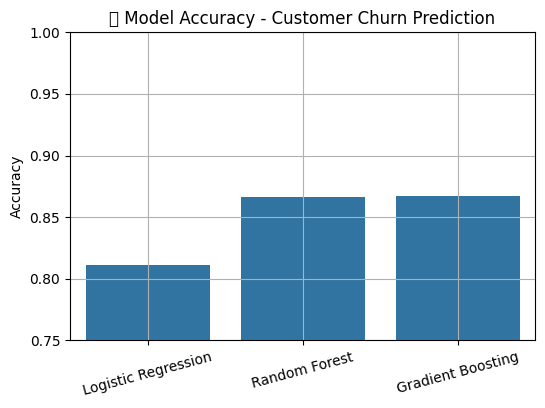

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Upload CSV File (For Google Colab or Jupyter)
try:
    from google.colab import files
    uploaded = files.upload()  # Upload 'Churn_Modelling.csv'
except:
    print("Not using Colab - make sure the file is in the working directory.")

# Step 3: Load Dataset
df = pd.read_csv('Churn_Modelling.csv')

# Step 4: Data Preprocessing
# Drop irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Label encode 'Gender'
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

# One-hot encode 'Geography'
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n🔍 Model: {name}")
    print("✅ Accuracy:", acc)
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Plot Accuracy of All Models
plt.figure(figsize=(6, 4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("📊 Model Accuracy - Customer Churn Prediction")
plt.ylabel("Accuracy")
plt.ylim(0.75, 1.0)
plt.xticks(rotation=15)
plt.grid(True)
plt.show()
